# Importing Liberaries for Data Processing

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics # for calculating rootmean square

# Importing Data Visualization Liberies

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Machine Learning Liberaries

In [3]:
# Models to be used
from lazypredict.Supervised import LazyClassifier # for checking best model


# Evaluation of the model
from sklearn.metrics import classification_report, accuracy_score, average_precision_score, f1_score


# Preprocessing of the data
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
import joblib # to extract data

# Loading the Data

In [4]:
df=pd.read_csv("Crop.csv")

# EDA

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice


# Description and Information About Data

In [6]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
df.size

17600

In [8]:
df.shape

(2200, 8)

In [9]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00
mean,50.55,53.36,48.15,25.62,71.48,6.47,103.46
std,36.92,32.99,50.65,5.06,22.26,0.77,54.96
min,0.00,5.00,5.00,8.83,14.26,3.50,20.21
25%,21.00,28.00,20.00,22.77,60.26,5.97,64.55
50%,37.00,51.00,32.00,25.60,80.47,6.43,94.87
75%,84.25,68.00,49.00,28.56,89.95,6.92,124.27
max,140.00,145.00,205.00,43.68,99.98,9.94,298.56


In [13]:
corr=df.columns
corr

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [14]:
# lets check summery for all the Classes

print("Average N : {0:.2f}".format(df['N'].mean()))
print("Average P : {0:.2f}".format(df['P'].mean()))
print("Average K : {0:.2f}".format(df['K'].mean()))
print("Average temperature : {0:.2f}".format(df['temperature'].mean()))
print("Average ph : {0:.2f}".format(df['ph'].mean()))
print("Average rainfall : {0:.2f}".format(df['rainfall'].mean()))

Average N : 50.55
Average P : 53.36
Average K : 48.15
Average temperature : 25.62
Average ph : 6.47
Average rainfall : 103.46


# Data Processing & Data Cleaning

In [15]:
df.drop_duplicates(inplace=True) # duplicate data drop if any

# Finding Skewness

In [16]:
df.skew().sort_values(ascending=True)

humidity      -1.09
temperature    0.18
ph             0.28
N              0.51
rainfall       0.97
P              1.01
K              2.38
dtype: float64

# Visualization of Data (Plot Analysis)

## Pair Plot

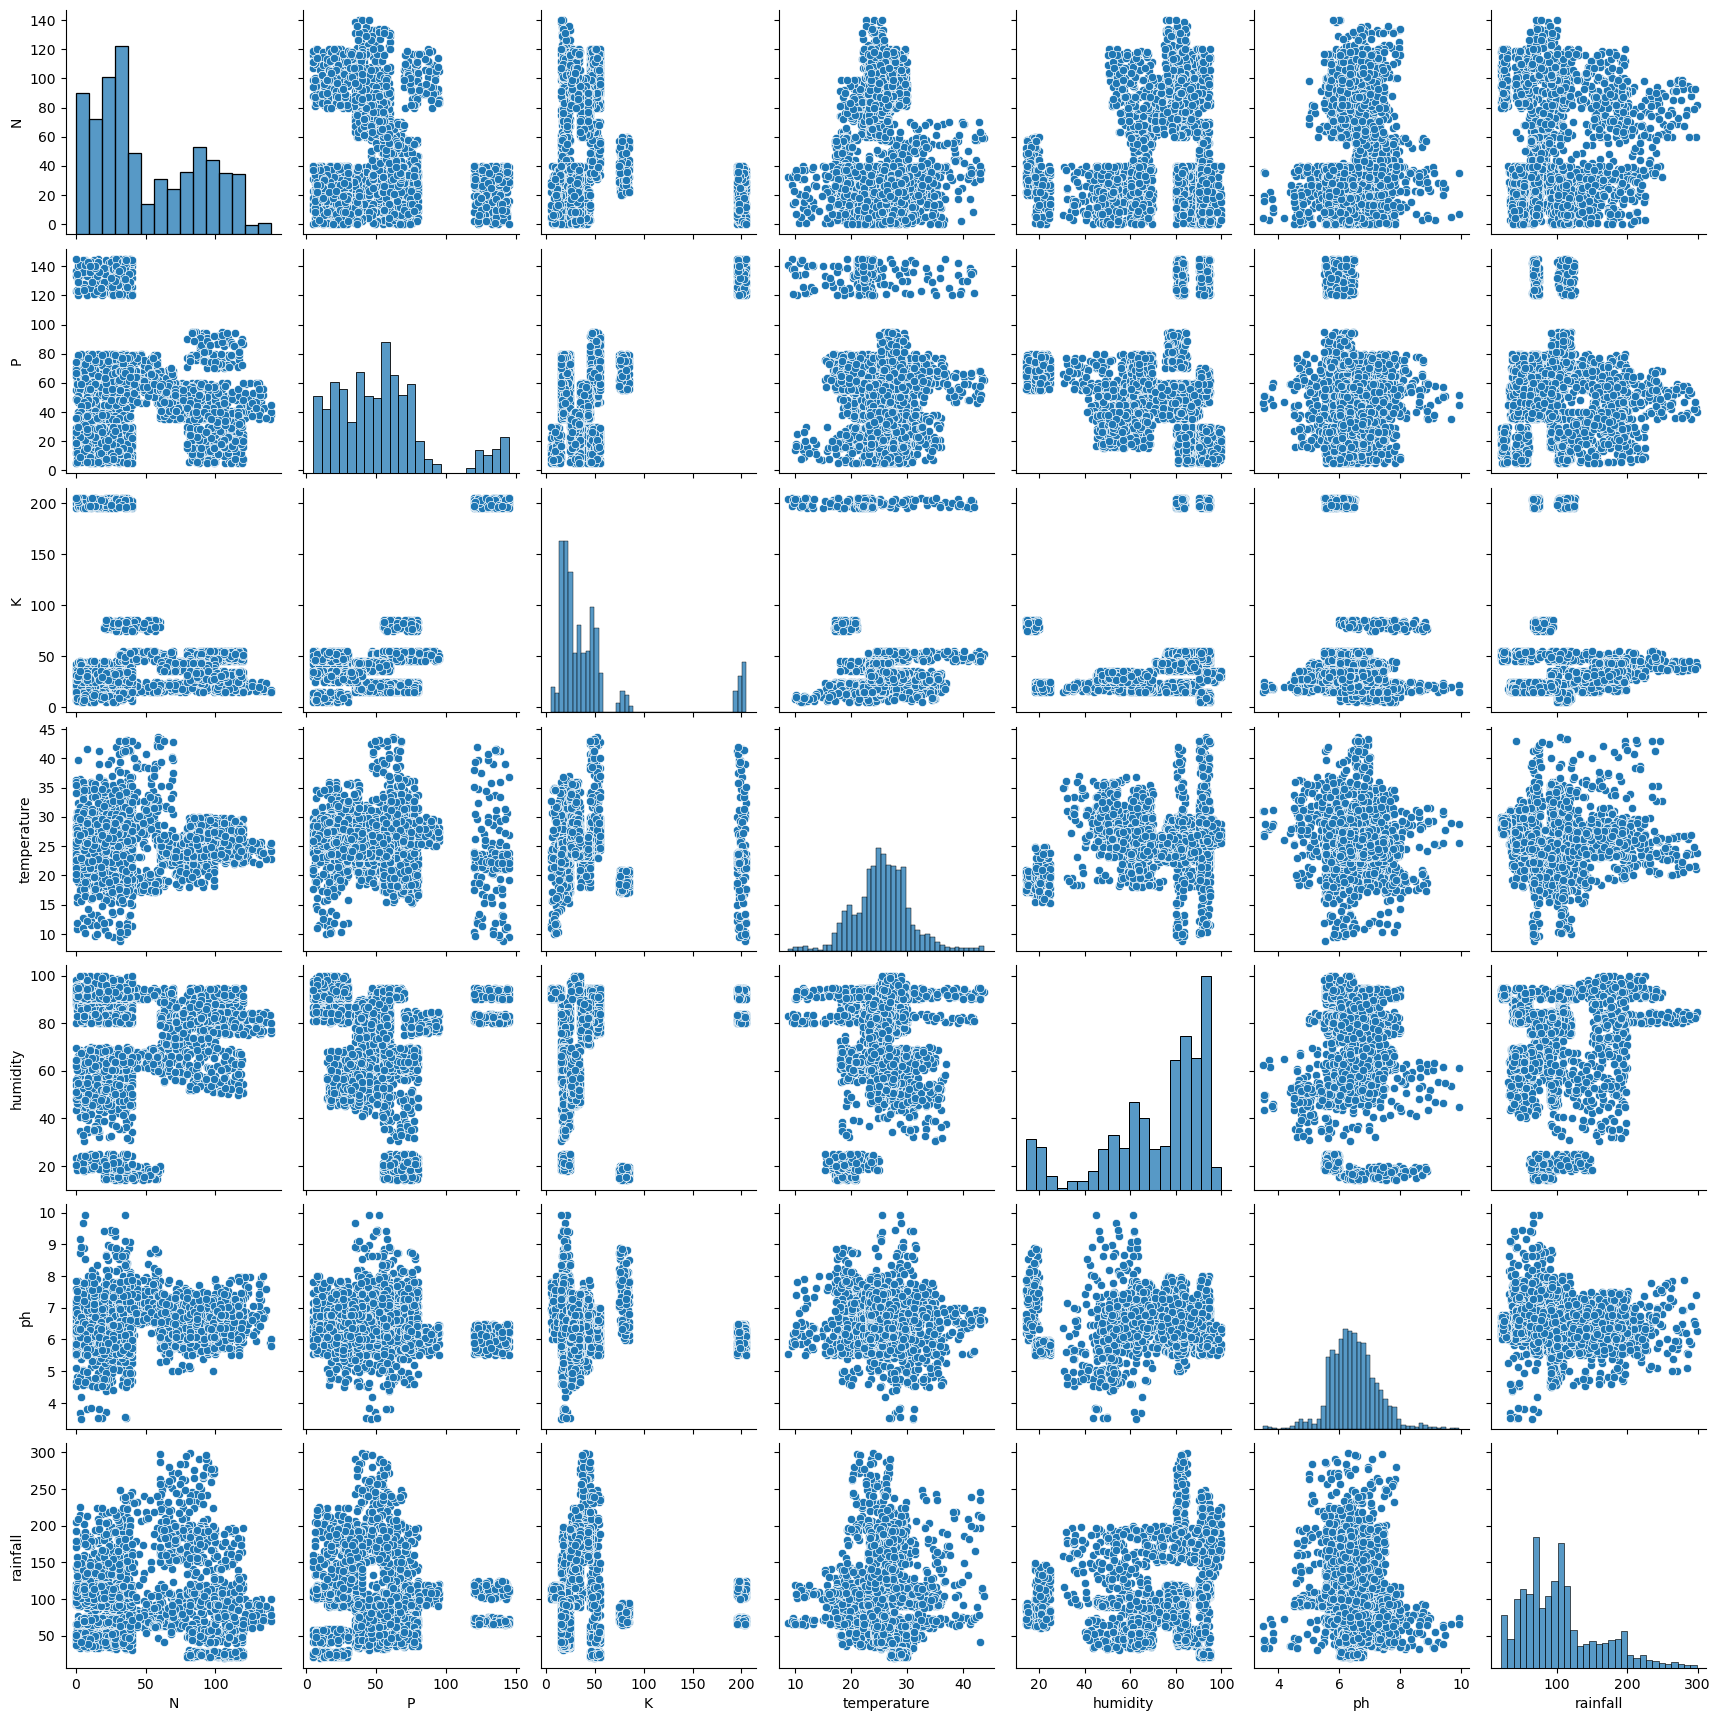

In [17]:
sns.pairplot(df)
plt.show()

In [18]:
# Defining Target Variable

<Figure size 1500x2000 with 0 Axes>

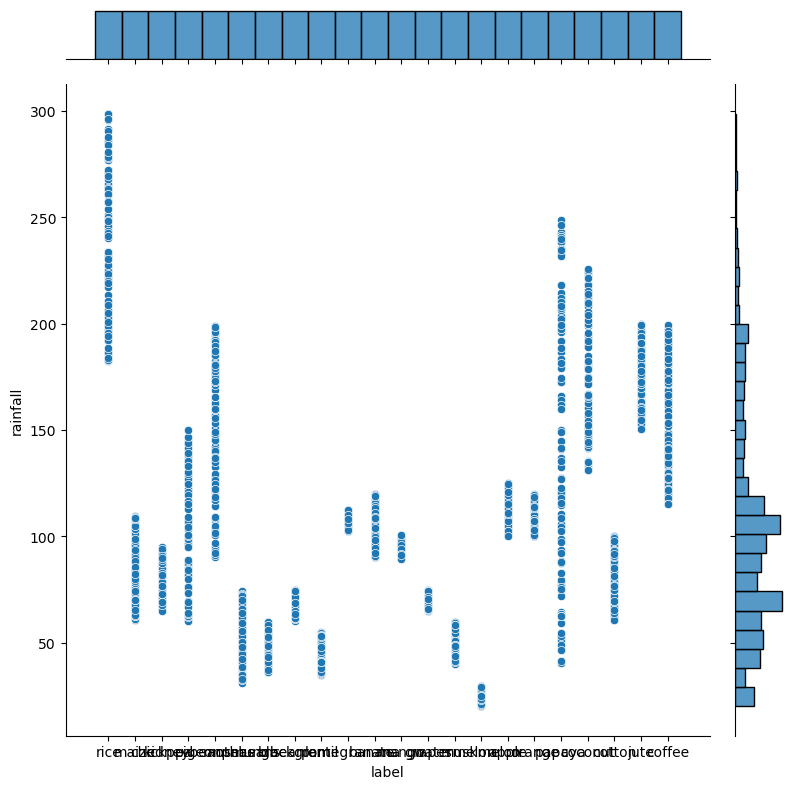

In [19]:
plt.figure(figsize = (15, 20))
sns.jointplot(data=df, x="label", y="rainfall", kind='scatter',height=8,ratio=9,space=0.5)
plt.show()

In [20]:
# from graph you can clearly see that rice needs more rainfall

# Box Plot

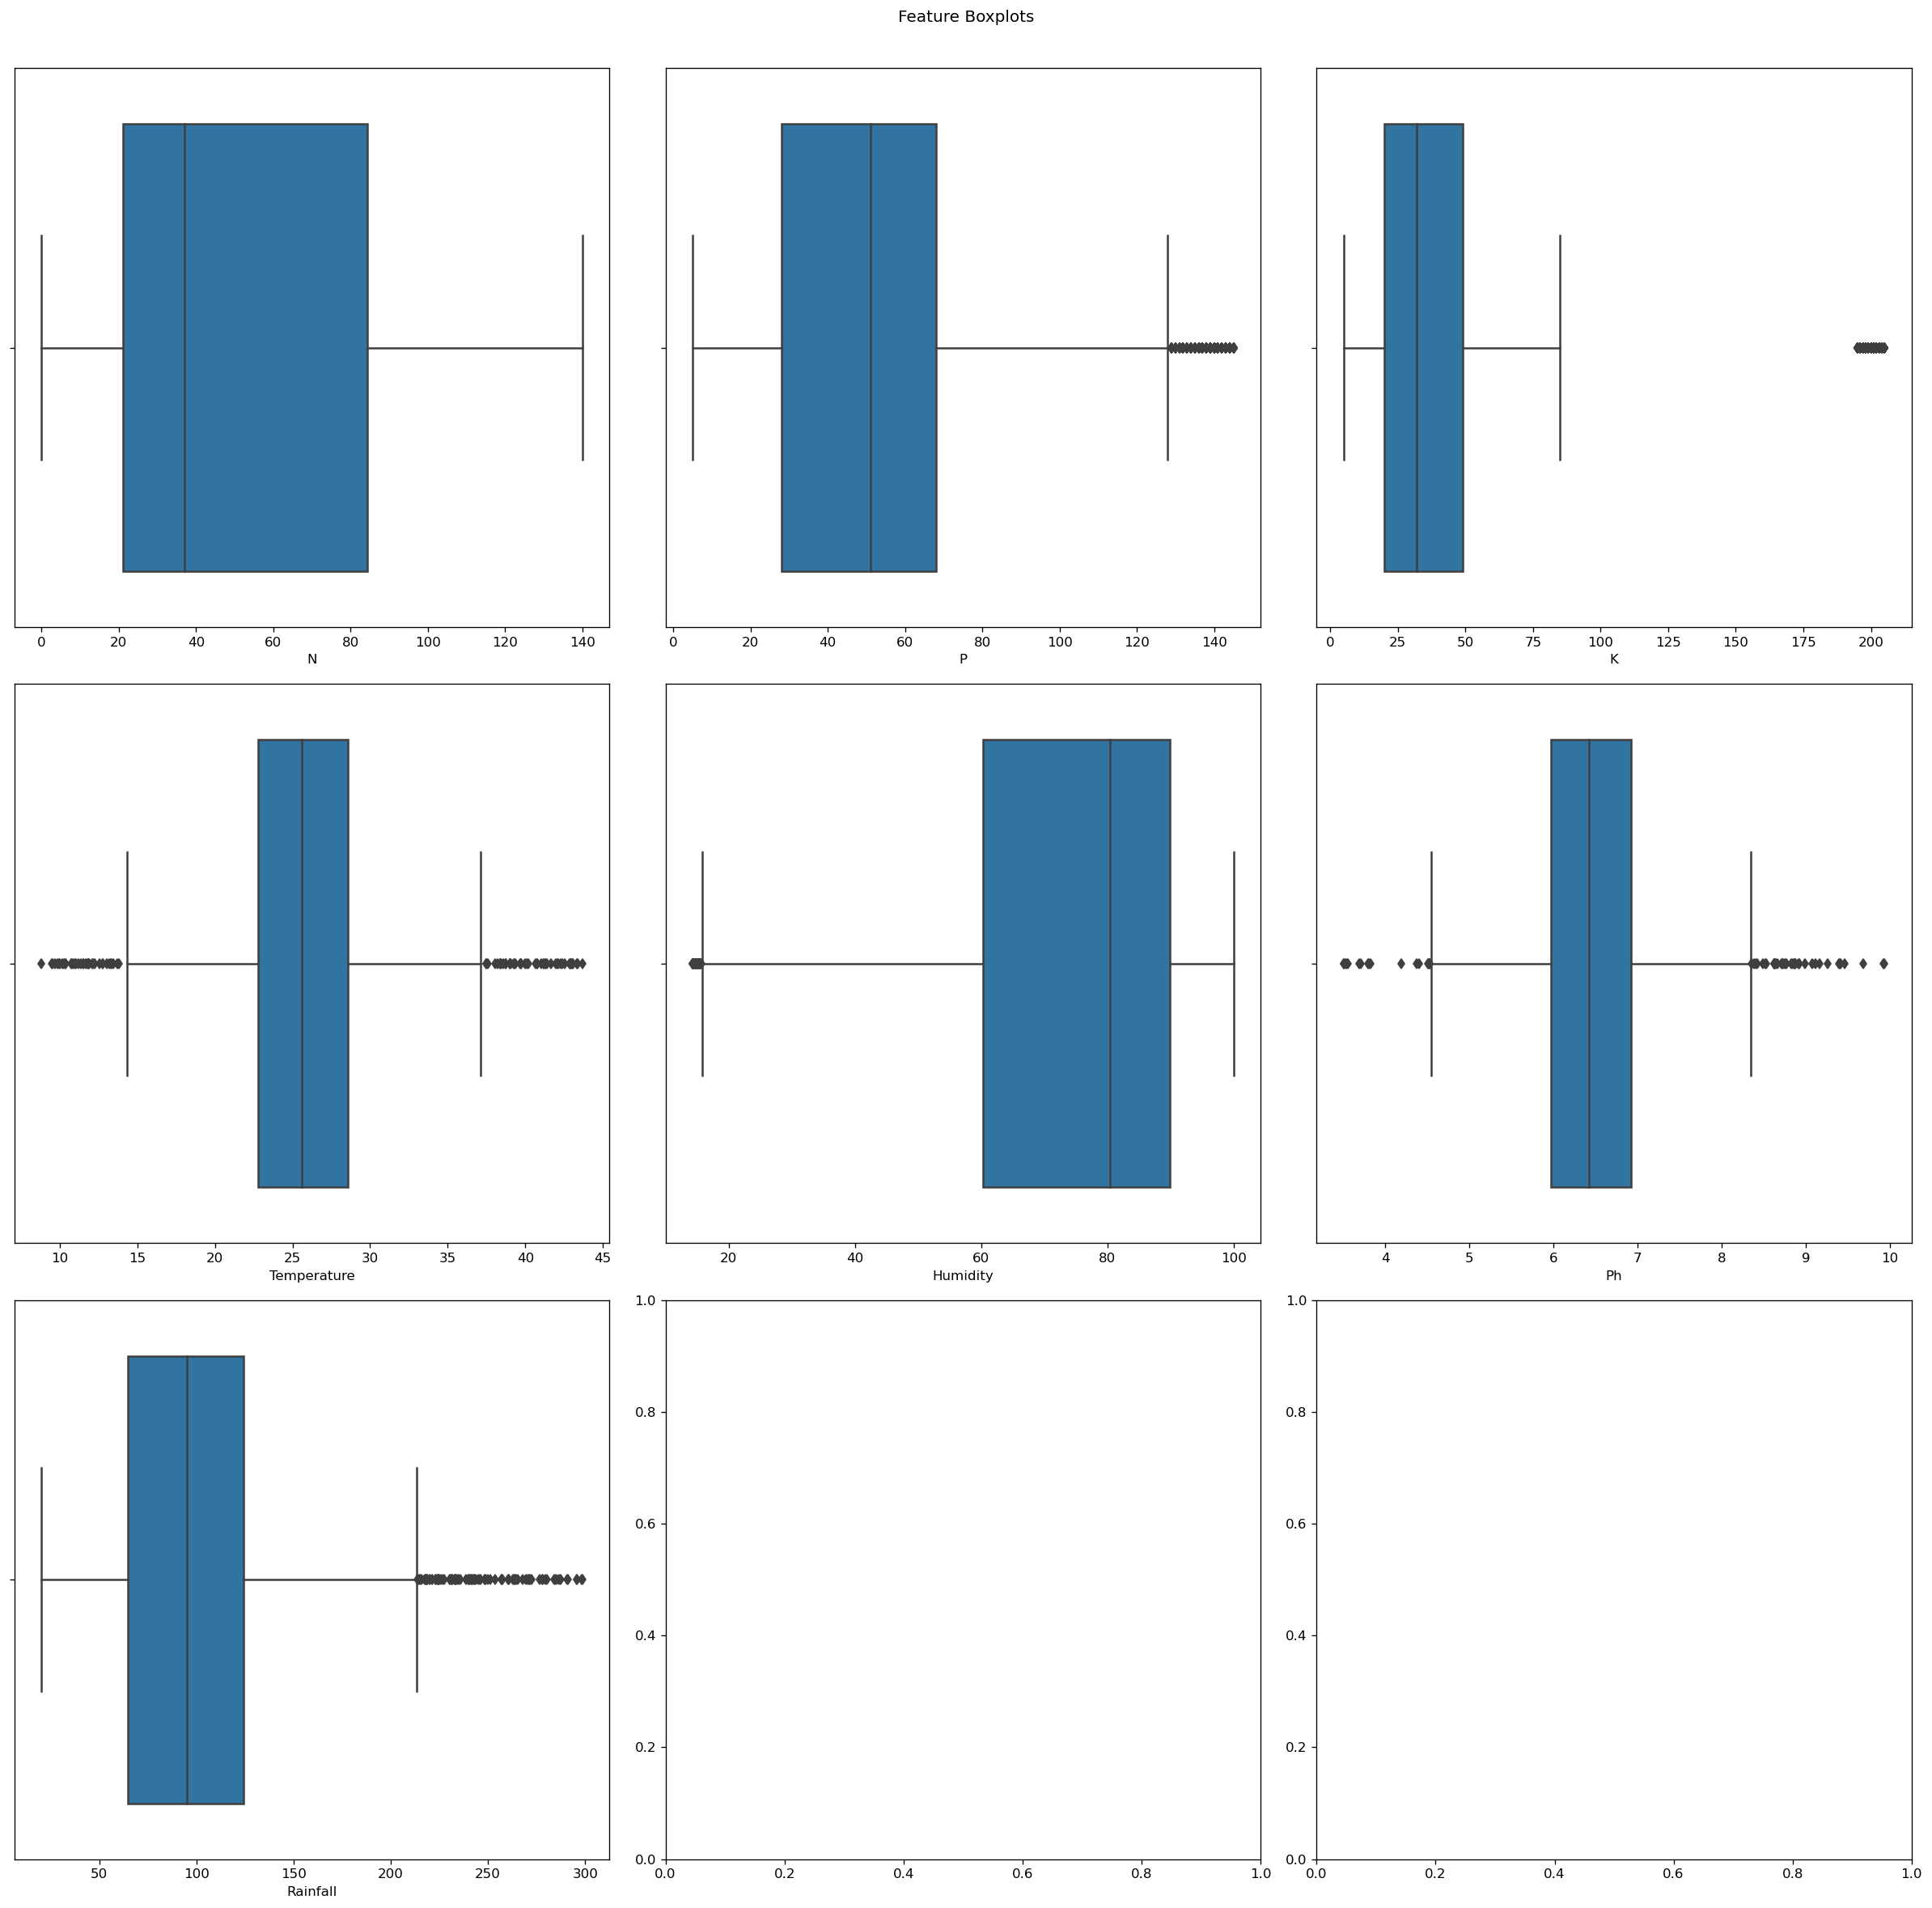

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20), dpi=120)
for i, j in zip(corr[:7], axes.flatten()):
    sns.boxplot(data=df, x=i, ax=j)
    j.set_xlabel(f"{i.title().replace('_', ' ')}")
plt.suptitle(f"Feature Boxplots")
plt.tight_layout()
plt.subplots_adjust(top=0.95);
plt.show()

# Heat Map

In [22]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.00,-0.23,-0.14,0.03,0.19,0.10,0.06
P,-0.23,1.00,0.74,-0.13,-0.12,-0.14,-0.06
K,-0.14,0.74,1.00,-0.16,0.19,-0.17,-0.05
temperature,0.03,-0.13,-0.16,1.00,0.21,-0.02,-0.03
humidity,0.19,-0.12,0.19,0.21,1.00,-0.01,0.09
ph,0.10,-0.14,-0.17,-0.02,-0.01,1.00,-0.11
rainfall,0.06,-0.06,-0.05,-0.03,0.09,-0.11,1.00


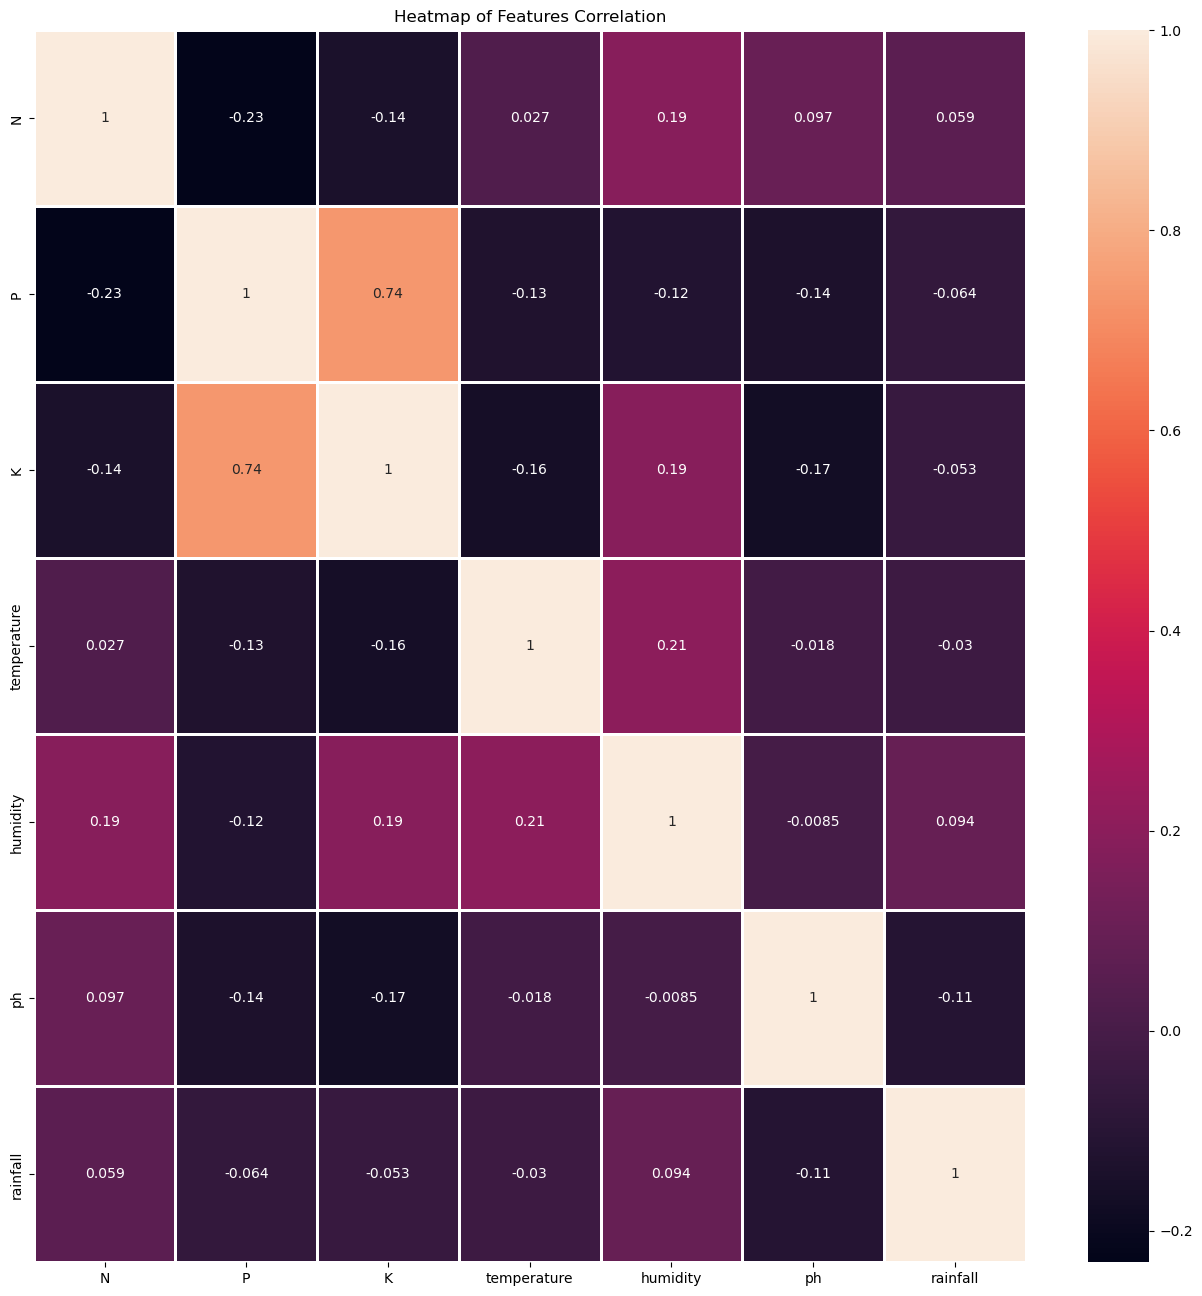

In [23]:
corr=df.corr()
plt.subplots(figsize = (16, 16))
plt.title('Heatmap of Features Correlation')
hmap = sns.heatmap(corr, linewidth = 0.80, annot=True,linecolor='white',robust=True)
plt.show()

#  Outlier Detection

N
Skewness :  0.51


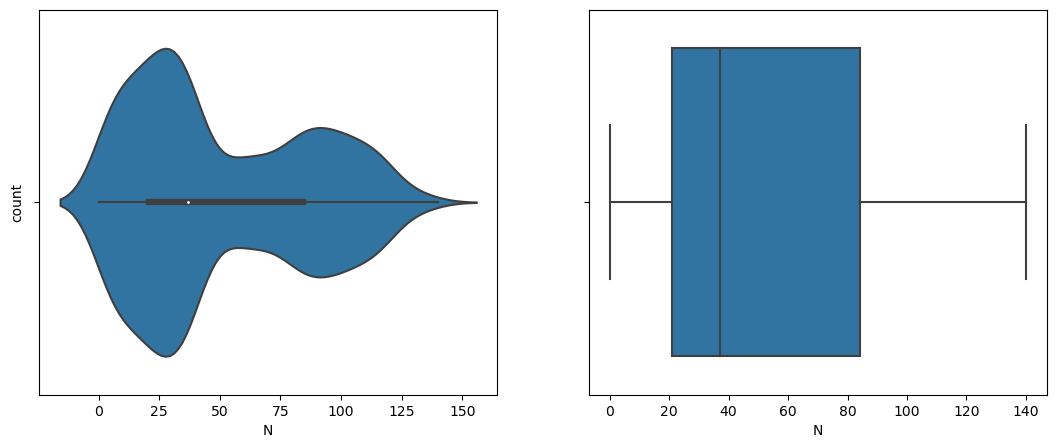

P
Skewness :  1.011


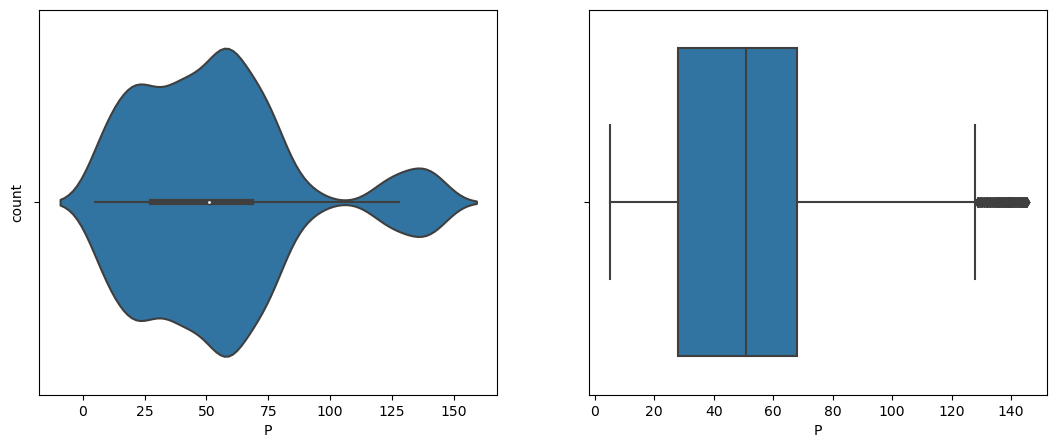

K
Skewness :  2.375


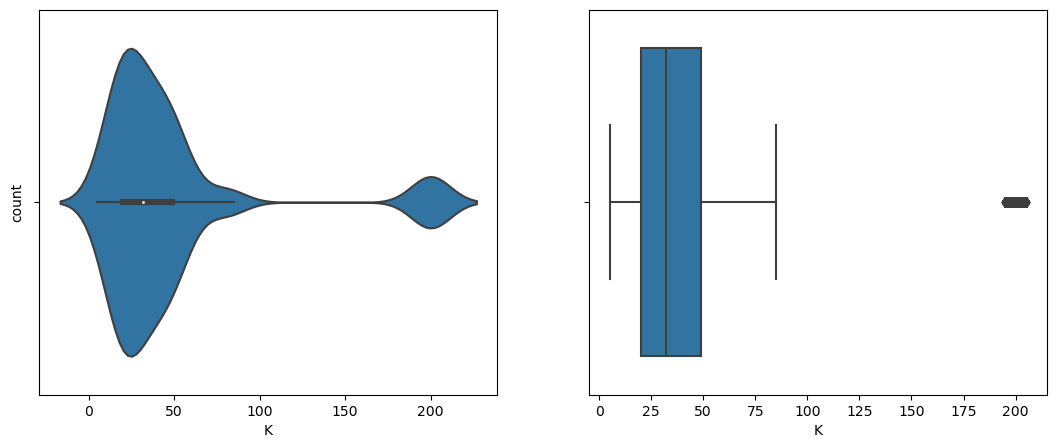

temperature
Skewness :  0.185


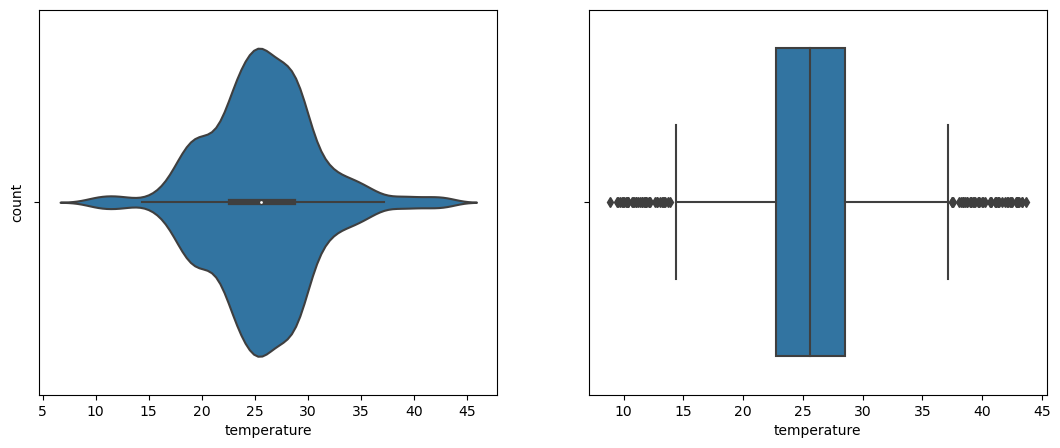

humidity
Skewness :  -1.092


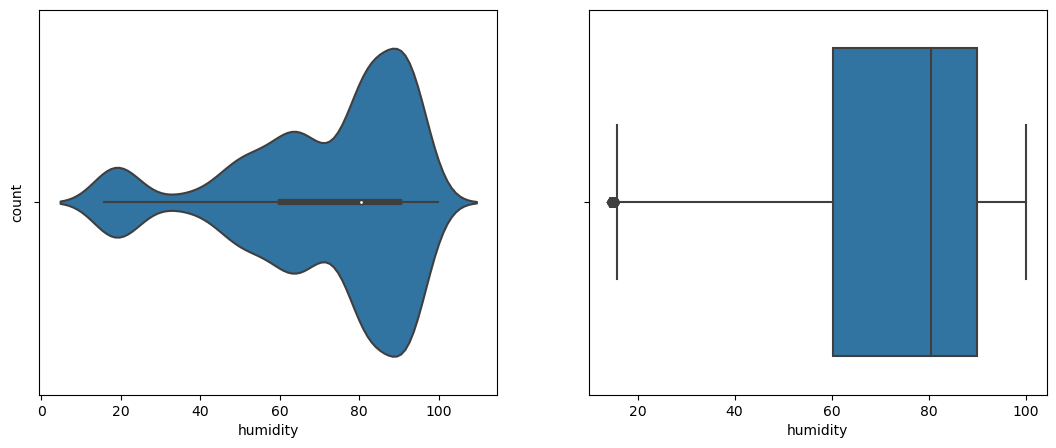

ph
Skewness :  0.284


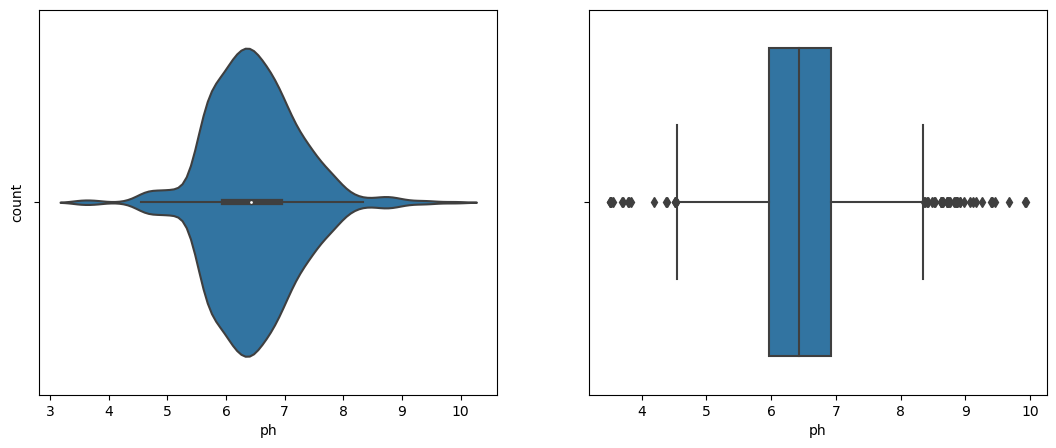

rainfall
Skewness :  0.966


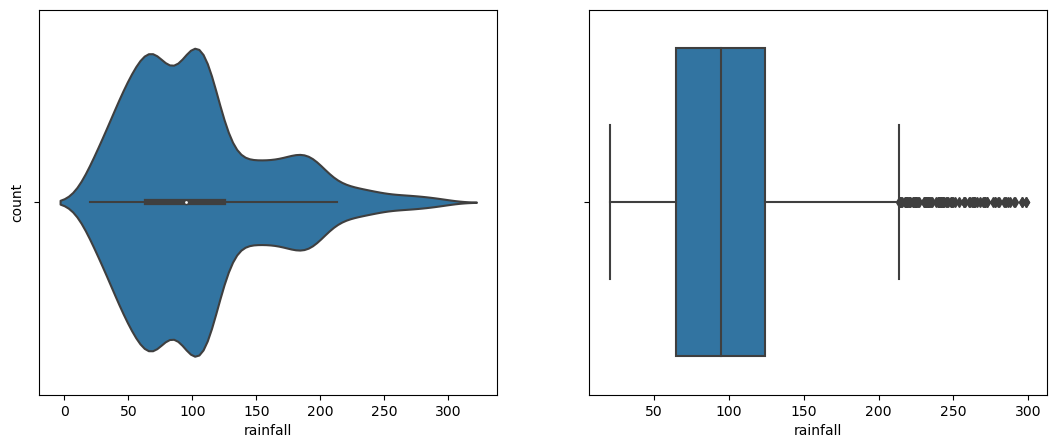

label


TypeError: could not convert string to float: 'rice'

In [24]:
# Lets check outliers 

for i in df:
    if i !='Class':
        print(i)
        print("Skewness : ", round(df[i].skew(),3))
        plt.figure(figsize=(13,5))
        plt.subplot(1,2,1)
        sns.violinplot(df[i])
        plt.ylabel('count')
        plt.subplot(1,2,2)
        sns.boxplot(x=df[i])
        plt.show()    

# Analysis of Agriculture Condition

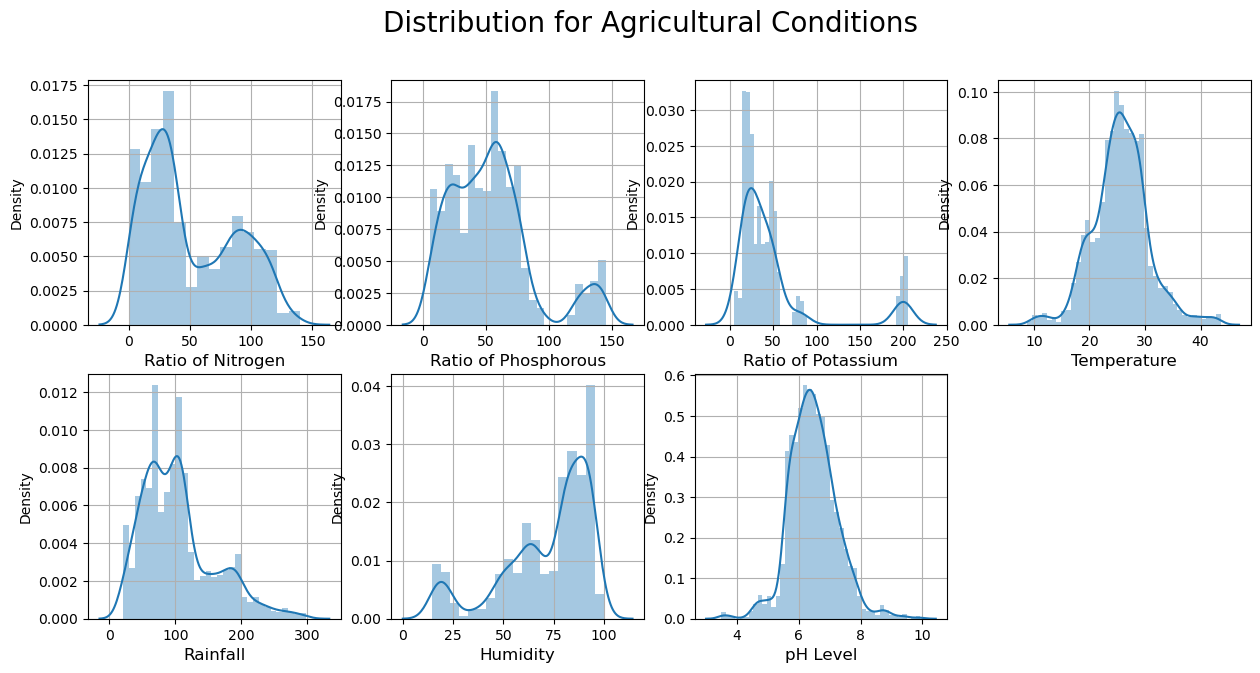

In [27]:
### Lets check the distribution of Agricultural Conditions

plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.distplot(df['N'])
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(df['P'])
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(df['K'])
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(df['temperature'])
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(df['rainfall'])
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(df['humidity'])
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(df['ph'])
plt.xlabel('pH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()

In [28]:
## Lets find out some Interesting Facts

print("Some Interesting Patterns")
print("---------------------------------")
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", df[df['N'] > 120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", df[df['P'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", df[df['K'] > 200]['label'].unique())
print("Crops which requires very High Rainfall:", df[df['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature :", df[df['temperature'] < 10]['label'].unique())
print("Crops which requires very High Temperature :", df[df['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidity:", df[df['humidity'] < 20]['label'].unique())
print("Crops which requires very Low pH:", df[df['ph'] < 4]['label'].unique())
print("Crops which requires very High pH:", df[df['ph'] > 9]['label'].unique())

Some Interesting Patterns
---------------------------------
Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature : ['grapes']
Crops which requires very High Temperature : ['grapes' 'papaya']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low pH: ['mothbeans']
Crops which requires very High pH: ['mothbeans']


In [29]:
### Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season

print("Summer Crops")
print(df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(df[(df['temperature'] < 20) & (df['humidity'] > 30)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(df[(df['rainfall'] > 200) & (df['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [31]:
### Lets try to Cluster these Crops

# lets import the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Lets select the Spending score, and Annual Income Columns from the Data
x = df.loc[:, ['N','P','K','temperature','ph','humidity','rainfall']].values

# let's check the shape of x
print(x.shape)

# lets convert this data into a dataframe
x_df  = pd.DataFrame(x)
x_df.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.00,42.00,43.00,20.88,6.50,82.00,202.94
1,85.00,58.00,41.00,21.77,7.04,80.32,226.66
2,60.00,55.00,44.00,23.00,7.84,82.32,263.96
3,74.00,35.00,40.00,26.49,6.98,80.16,242.86
4,78.00,42.00,42.00,20.13,7.63,81.60,262.72


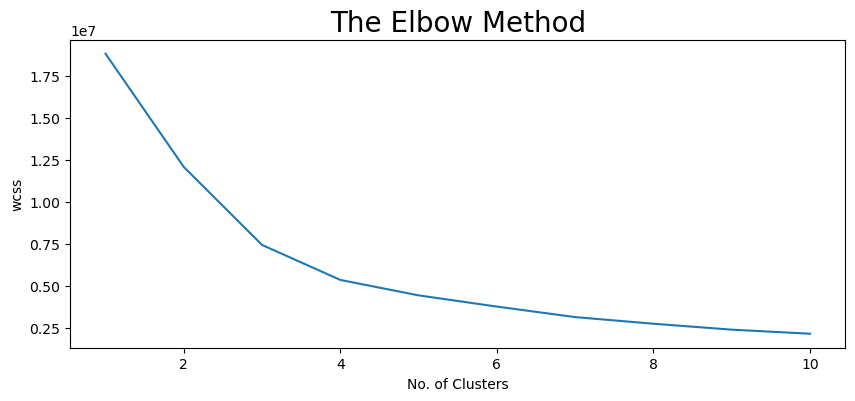

In [32]:
# lets determine the Optimum Number of Clusters within the Dataset

from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

# lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [33]:
# lets implement the K Means algorithm to perform Clustering analysis
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# lets find out the Results
a = df['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# lets check the Clusters of each Crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Forth Cluster:", z[z['cluster'] == 3]['label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------
Crops in Third Cluster: ['grapes' 'apple']
---------------------------------------------------------------
Crops in Forth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [34]:
# Hard Clustering

print("Results for Hard Clustering\n")
counts = z[z['cluster'] == 0]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 1:", list(d.index))
print("--------------------------------------------------")
counts = z[z['cluster'] == 1]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 2:", list(d.index))
print("--------------------------------------------------")
counts = z[z['cluster'] == 2]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 3:", list(d.index))
print("--------------------------------------------------")
counts = z[z['cluster'] == 3]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 4:", list(d.index))

Results for Hard Clustering

Crops in Cluster 1: ['chickpea', 'kidneybeans', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'mango', 'orange']
--------------------------------------------------
Crops in Cluster 2: ['maize', 'banana', 'watermelon', 'muskmelon', 'cotton']
--------------------------------------------------
Crops in Cluster 3: ['grapes', 'apple']
--------------------------------------------------
Crops in Cluster 4: ['rice', 'pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee']


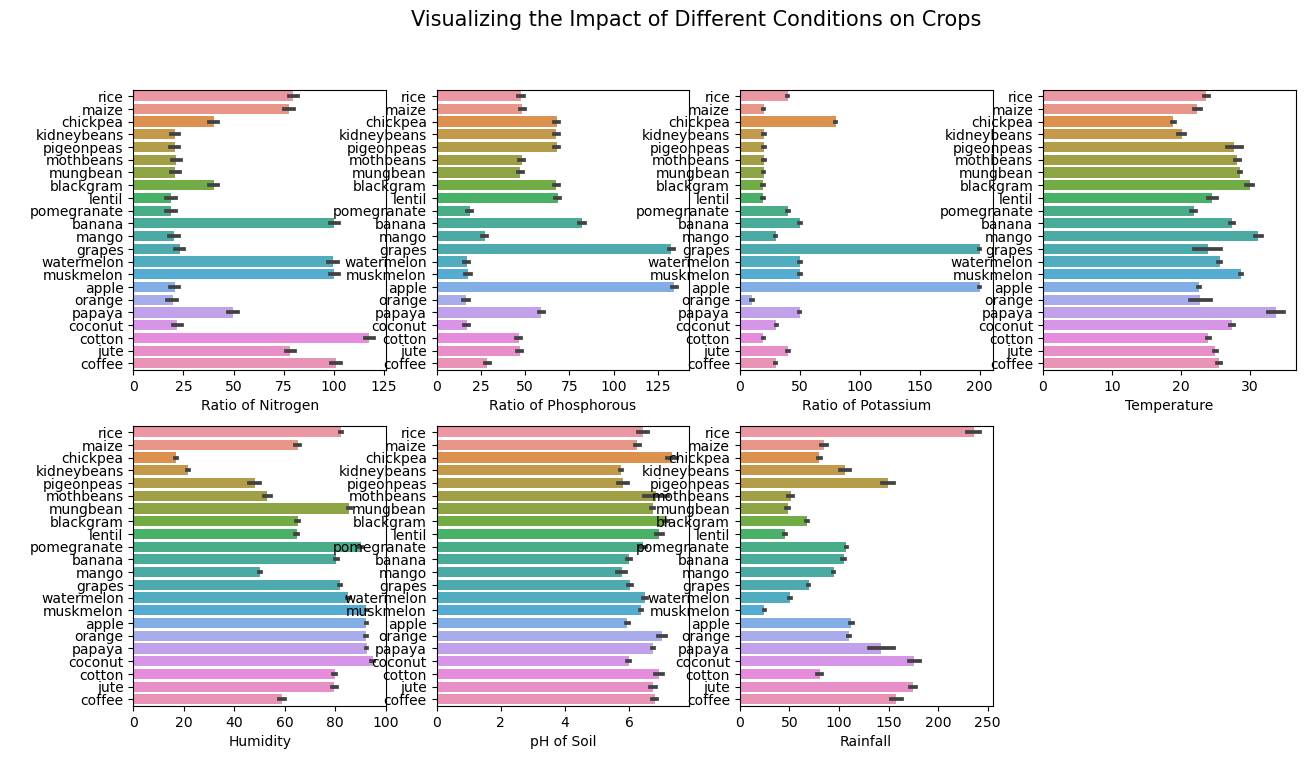

In [41]:
### Data Visualizations

plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 4, 1)
sns.barplot(df['N'], df['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 2)
sns.barplot(df['P'], df['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Phosphorous', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 3)
sns.barplot(df['K'], df["label"])
plt.ylabel(' ')
plt.xlabel('Ratio of Potassium', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 4)
sns.barplot(df['temperature'], df['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 5)
sns.barplot(df['humidity'], df['label'])
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 6)
sns.barplot(df['ph'], df['label'])
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 7)
sns.barplot(df['rainfall'], df['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 10)
plt.yticks(fontsize = 10)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize = 15)
plt.show()

# Defining Target Variable

In [49]:
# lets split the Dataset for Predictive Modelling

y = df['label']
X = df.drop(['label'], axis = 1)

print("Shape of X:", x.shape)
print("Shape of y:", y.shape)

Shape of X: (2200, 7)
Shape of y: (2200,)


In [50]:
# lets create Training and Testing Sets for Validation of Results
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.27, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (1606, 7)
The Shape of x test: (594, 7)
The Shape of y train: (1606,)
The Shape of y test: (594,)


# Lets Check Which Model Will Be Better

In [51]:
from lazypredict.Supervised import LazyClassifier
# Creating the LazyClassifier object
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [52]:
# Fitting the model on the training data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:07<00:00,  3.88it/s]


In [53]:
# Printing the performance metrics of the models
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00    None      1.00   
GaussianNB                         0.99               1.00    None      0.99   
BaggingClassifier                  0.99               1.00    None      0.99   
LGBMClassifier                     0.99               0.99    None      0.99   
LabelSpreading                     0.98               0.98    None      0.98   
SVC                                0.98               0.98    None      0.98   
KNeighborsClassifier               0.98               0.98    None      0.98   
LabelPropagation                   0.98               0.98    None      0.98   
DecisionTreeClassifier             0.98 

In [54]:
# As You Can See That Random Forest has Accuracy higher than anyone lets try that

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
#model
rf=RandomForestClassifier()

#fitting

rf.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
# predicting via Decision Tree Algorithm

y_pred=rf.predict(X_test)

y_pred

array(['watermelon', 'watermelon', 'grapes', 'chickpea', 'blackgram',
       'rice', 'mothbeans', 'kidneybeans', 'muskmelon', 'banana',
       'mothbeans', 'coffee', 'lentil', 'mungbean', 'mango', 'apple',
       'coffee', 'lentil', 'coffee', 'mango', 'coconut', 'blackgram',
       'kidneybeans', 'jute', 'cotton', 'coffee', 'lentil', 'orange',
       'mothbeans', 'kidneybeans', 'pomegranate', 'rice', 'maize',
       'muskmelon', 'coconut', 'cotton', 'mango', 'mango', 'watermelon',
       'mothbeans', 'maize', 'blackgram', 'pigeonpeas', 'watermelon',
       'pigeonpeas', 'mungbean', 'kidneybeans', 'kidneybeans', 'cotton',
       'mungbean', 'mothbeans', 'blackgram', 'apple', 'muskmelon',
       'pigeonpeas', 'banana', 'papaya', 'mango', 'lentil', 'cotton',
       'orange', 'mungbean', 'watermelon', 'rice', 'muskmelon', 'apple',
       'grapes', 'coffee', 'apple', 'orange', 'coconut', 'pomegranate',
       'kidneybeans', 'maize', 'grapes', 'mothbeans', 'chickpea', 'maize',
       'jute',

In [58]:
# compute accuracy on training set 

rf_train= rf.score(X_train,y_train)

print("Training Data Accuracy by Random Forest Algorithm is : " , round(rf_train,4))

# compute accuracy on testing set 

rf_test= rf.score(X_test,y_test)

print("Testing Data Accuracy by Random Forest Algorithm is : " , round(rf_test,4))



Training Data Accuracy by Random Forest Algorithm is :  1.0
Testing Data Accuracy by Random Forest Algorithm is :  0.9966


# Confusion Matrix

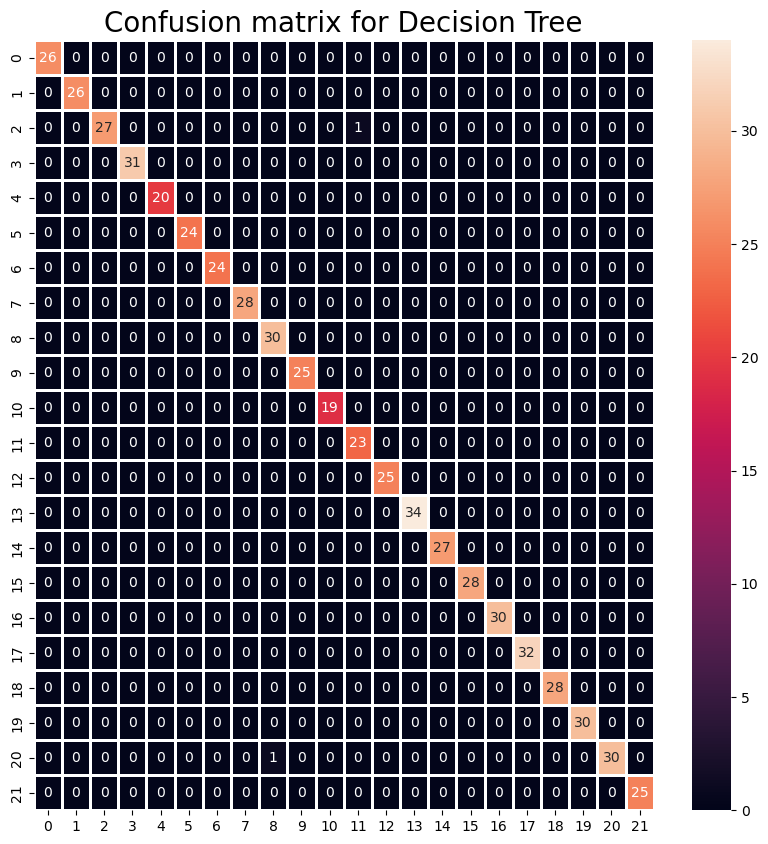

In [59]:
# lets find out our model performance

from sklearn.metrics import confusion_matrix

#Lets print the confusion metrix for this model

plt.rcParams['figure.figsize']=(10,10)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,linewidths=1,linecolor='white',cbar=True)
plt.title("Confusion matrix for Decision Tree",fontsize=20)
plt.show()


In [61]:
# lets print the Classification Report also
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        26
      banana       1.00      1.00      1.00        26
   blackgram       1.00      0.96      0.98        28
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        28
        jute       0.97      1.00      0.98        30
 kidneybeans       1.00      1.00      1.00        25
      lentil       1.00      1.00      1.00        19
       maize       0.96      1.00      0.98        23
       mango       1.00      1.00      1.00        25
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        30
      papaya       1.00    

# Lets Check Model With Real Time Prediction

In [64]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice


In [63]:
pred = rf.predict((np.array([[90,40,40,20,80,7,200]])))
print("The Recomended Crop for Given Climatic Condition is :", pred)

The Recomended Crop for Given Climatic Condition is : ['rice']


In [65]:
pred = rf.predict((np.array([[120,70,60,16,40,4,120]])))
print("The Recomended Crop for Given Climatic Condition is :", pred)

The Recomended Crop for Given Climatic Condition is : ['banana']
